In [1]:
!rm -rf Training-ML-with-GoogleColab && git clone https://github.com/HiroshimaSatoshi/Training-ML-with-GoogleColab.git && cp -R Training-ML-with-GoogleColab/* . 

Cloning into 'Training-ML-with-GoogleColab'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 26 (delta 5), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
from Logistic import regressionGD

In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris['DESCR'])

# 特徴量抽出
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
from sklearn.model_selection import train_test_split

# 30%のテストデータと70%の訓練データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#出現回数を確認
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
# 特徴量の標準化
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# エポック数40 , 学習率0.1でパーセプトロンのインスタンスを生成
ppn =  Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified examplles: %d' %  (y_test != y_pred).sum()) # 誤分類のデータの個数

Misclassified examplles: 1


In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len( np.unique(y) )])

  # 決定領域
  x1_min, x1_max =X[:, 0].min() -1, X[:, 0].max() +1
  x2_min, x2_max =X[:, 1].min() -1, X[:, 1].max() +1

  # Grid point
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # クラスごとにデータ点をプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl , edgecolor='black')

  # テストデータ
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=1.0, linewidths=1, marker='o', s=100, label='test set')

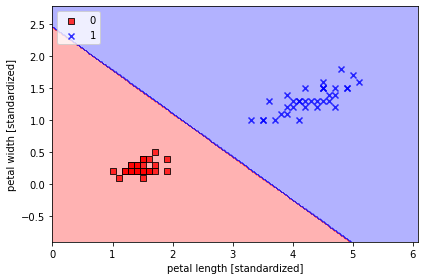

In [7]:
X_train_01_subset = X_train[(y_train == 0)| (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0)| (y_train == 1)]
# ロジスティック回帰のインスタンスを生成
lrgd = regressionGD.LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# モデルを訓練データに適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)
#　決定領域をプロット
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

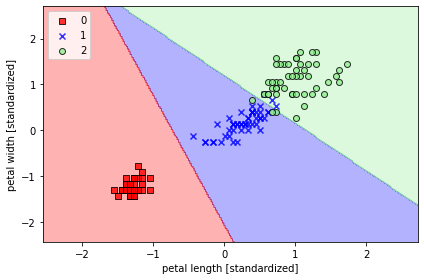

In [14]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1, solver="lbfgs", multi_class="ovr")
# 訓練でオータをモデルに適合させる
lr.fit(X_train_std, y_train)
# 決定協会をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,105))
# 軸ラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例を設定
plt.legend(loc='upper left')
# グラフを表示
plt.tight_layout()
plt.show()